<a href="https://colab.research.google.com/github/zihvvan/MachineLearning/blob/main/zihvvan/ch08_ML_05_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# https://www.kaggle.com/datasets/ayessa/salary-prediction-classification
# https://www.kaggle.com/datasets/ayessa/salary-prediction-classification/code?datasetId=2096417&sortBy=voteCount
df = pd.read_csv(
    "https://github.com/BigData23th/Data/raw/main/salary.csv",
    skipinitialspace=True
    )
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [23]:
# 결측치, 열별 타입
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [24]:
pd.options.display.float_format = '{:.2f}'.format
# 연속형 변수
# age : 연령
# education-num : 교육수준등급
# capital-gain : 자산 증가량
# capital-loss : 자산 감소량
# hours-per-week : 주당 노동 시간
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.00,48842.00,48842.00,48842.00,48842.00
mean,38.64,10.08,1079.07,87.50,40.42
std,13.71,2.57,7452.02,403.00,12.39
min,17.00,1.00,0.00,0.00,1.00
25%,28.00,9.00,0.00,0.00,40.00
50%,37.00,10.00,0.00,0.00,40.00
75%,48.00,12.00,0.00,0.00,45.00
max,90.00,16.00,99999.00,4356.00,99.00


In [25]:
# 범주(명목)형 변수
# workclass : 고용 형태
# education : 학력
# marital-status : 결혼 상태
# occupation : 직업
# relationship : 가족관계
# race : 인종
# sex : 성별
# native-country : 출신국가
# class : 연봉 범위
df.describe(include='O')
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


# 전처리

## 종속변수 처리

In [26]:
# class / 종속변수 / 타깃 / 라벨
df['class']

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: class, Length: 48842, dtype: object

In [27]:
print(df['class'].unique())# 숫자 형태로 바꿔줘야 사용 가능
# 분류 -> 50k 초과 (1) / 50k 이하 (0)
# df['class'] = df['class'].map({' <=50K': 0, ' >50K':1})
df['class'] = df['class'].map({
    '<=50K':0, '>50K': 1
}) # map -> 이미 매핑된 
df['class']

['<=50K' '>50K']


0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: class, Length: 48842, dtype: int64

In [28]:
df['class'].value_counts()

0    37155
1    11687
Name: class, dtype: int64

<Axes: >

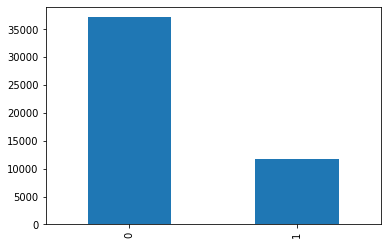

In [29]:
df['class'].value_counts().plot(kind='bar')

In [30]:
df['class'].value_counts() / len(df['class'])

0   0.76
1   0.24
Name: class, dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


범주형 변수의 변환
1. 순서형 : 크고 작음이 있음, 비교 연산은 되는데, 산술 연산이 안되서 통계값 X
1. 명목형 : 소속 여부, 특성 해당하는지... 비교 연산 X
---
1. 순서형은 순서대로 숫자로 만들어버리면 처리 가능
1. 범주형 변수에 대응하는 대표적인 숫자를 집어넣어줌 (평균 소득, 재산 수준)
    - 통계값에 따른 잘못된 모델링
1. 명목형 -> 원핫인코딩(0,1) => 더미변수
    - 열이 늘어나서 성능에 영향

In [35]:
df.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,46043,48842,48842,46033,48842,48842,48842,47985
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,33906,15784,22379,6172,19716,41762,32650,43832


In [36]:
# 범주형 변수 값
obj_list = df.describe(include='O').columns # 범주형 변수의 열 이름
obj_list

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

## 고유값이 10개 이상일 경우 선택
* 더미변수화 시키기 어렵기 때문에 변형, 삭제, 선택

In [37]:
# 범주형 변수 처리
# 1. 연속형 변수로 변환
# 2. drop (삭제)
# 3. dummies
# 고윳값이 10개 이상인 경우 -> dummies로 바꾸기에는 문제가 있음음
for o in obj_list:
    if df[o].nunique() >= 10: # 열 별 고유값의 갯수가 10개 이상이면
        print(o, df[o].nunique())

education 16
occupation 14
native-country 41


### education

In [38]:
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [40]:
df['education-num']
df['education-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: education-num, dtype: int64

In [44]:
# education / education-num 1대1 대응이 되는지 확인
for n in range(1, df.education.nunique()+1): # 1~education 고유값 + 1 (끝 제외)
    print(f"**{n}**") # 1 ~ 16
    # print(df[df['education-num'] == n]) # education-num이 n인 행
    # print(df[df['education-num'] == n].education) # education-num이 n인 행의 education
    print(df[df['education-num'] == n].education.unique()) # education-num이 n인 행의 education의 고유값
    # print(df[df['education-num'] == n]['education'].unique())

**1**
['Preschool']
**2**
['1st-4th']
**3**
['5th-6th']
**4**
['7th-8th']
**5**
['9th']
**6**
['10th']
**7**
['11th']
**8**
['12th']
**9**
['HS-grad']
**10**
['Some-college']
**11**
['Assoc-voc']
**12**
['Assoc-acdm']
**13**
['Bachelors']
**14**
['Masters']
**15**
['Prof-school']
**16**
['Doctorate']


In [45]:
df.drop('education', axis = 1, inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education-num   48842 non-null  int64 
 3   marital-status  48842 non-null  object
 4   occupation      46033 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  47985 non-null  object
 12  class           48842 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 4.8+ MB


### occupation

In [47]:
# 직업군 -> 우열 없음
df.occupation.value_counts() # 더미변수화

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [50]:
# 고연봉자(50k) 비율을 적용
df.groupby('occupation')['class'].mean()
df.groupby('occupation')['class'].mean().sort_values(ascending=False)

occupation
Exec-managerial     0.48
Prof-specialty      0.45
Armed-Forces        0.33
Protective-serv     0.31
Tech-support        0.29
Sales               0.27
Craft-repair        0.23
Transport-moving    0.20
Adm-clerical        0.14
Machine-op-inspct   0.12
Farming-fishing     0.12
Handlers-cleaners   0.07
Other-service       0.04
Priv-house-serv     0.01
Name: class, dtype: float64

### native-country

In [53]:
df['native-country'].value_counts()
# 1. 미국 - 비미국 => 1, 0 (eq, ==)
df['native-country'].eq('United-States').mul(1).value_counts()
# 2. 대륙별/언어권별/인종별 -> 추가적인 기준을 만들어서 그룹화한다음 더미변수화
# 3. 순서화 시켜버림 => 출신국가별로 고연봉자 비율을 구해서 -> 해당 비율별로 수치형 변수

1    43832
0     5010
Name: native-country, dtype: int64

In [54]:
# groupby(묶고 싶은 열 이름)[확인하고 싶은 열 이름].적용하고 싶은 그룹함수()
# 고연봉자인 사람은 1, 아닌 사람은 0 => (고연봉자들 1) / 전체 데이터 수 => 전체 사람 대비 고연봉자의 비율
# class 0,1 => (1:고연봉자)의 비율
df.groupby('native-country')['class'].mean()

native-country
Cambodia                     0.32
Canada                       0.35
China                        0.30
Columbia                     0.05
Cuba                         0.25
Dominican-Republic           0.05
Ecuador                      0.13
El-Salvador                  0.07
England                      0.37
France                       0.42
Germany                      0.28
Greece                       0.37
Guatemala                    0.03
Haiti                        0.12
Holand-Netherlands           0.00
Honduras                     0.10
Hong                         0.27
Hungary                      0.32
India                        0.41
Iran                         0.37
Ireland                      0.30
Italy                        0.32
Jamaica                      0.14
Japan                        0.35
Laos                         0.09
Mexico                       0.05
Nicaragua                    0.06
Outlying-US(Guam-USVI-etc)   0.04
Peru                         0.09

In [56]:
# 오름차순 (작은->큰데이터)
df.groupby('native-country')['class'].mean().sort_values()
# 내림차순 (큰->작은데이터)
df.groupby('native-country')['class'].mean().sort_values(ascending=False)

native-country
France                       0.42
India                        0.41
Taiwan                       0.40
Iran                         0.37
England                      0.37
Greece                       0.37
Yugoslavia                   0.35
Japan                        0.35
Canada                       0.35
Italy                        0.32
Cambodia                     0.32
Hungary                      0.32
Ireland                      0.30
China                        0.30
Philippines                  0.29
Germany                      0.28
Hong                         0.27
Cuba                         0.25
United-States                0.24
Poland                       0.20
Portugal                     0.18
South                        0.17
Thailand                     0.17
Scotland                     0.14
Jamaica                      0.14
Ecuador                      0.13
Haiti                        0.12
Puerto-Rico                  0.11
Honduras                     0.10

In [57]:
country_group = df.groupby('native-country')['class'].mean() # 출신국가별 고연봉자 비율
# country_group 나라별 고연봉자 비율을 원래 df에 합치고 싶어요
# pd.merge(...) df1.merge(df2)

In [58]:
pd.options.display.float_format = '{:.4f}'.format
print(df.groupby('native-country')['class'].mean().sort_values(ascending=False))
pd.options.display.float_format = '{:.2f}'.format

native-country
France                       0.4211
India                        0.4106
Taiwan                       0.4000
Iran                         0.3729
England                      0.3701
Greece                       0.3673
Yugoslavia                   0.3478
Japan                        0.3478
Canada                       0.3462
Italy                        0.3238
Cambodia                     0.3214
Hungary                      0.3158
Ireland                      0.2973
China                        0.2951
Philippines                  0.2881
Germany                      0.2816
Hong                         0.2667
Cuba                         0.2464
United-States                0.2440
Poland                       0.1954
Portugal                     0.1791
South                        0.1739
Thailand                     0.1667
Scotland                     0.1429
Jamaica                      0.1415
Ecuador                      0.1333
Haiti                        0.1200
Puerto-Rico  

In [59]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


In [60]:
country_group

native-country
Cambodia                     0.32
Canada                       0.35
China                        0.30
Columbia                     0.05
Cuba                         0.25
Dominican-Republic           0.05
Ecuador                      0.13
El-Salvador                  0.07
England                      0.37
France                       0.42
Germany                      0.28
Greece                       0.37
Guatemala                    0.03
Haiti                        0.12
Holand-Netherlands           0.00
Honduras                     0.10
Hong                         0.27
Hungary                      0.32
India                        0.41
Iran                         0.37
Ireland                      0.30
Italy                        0.32
Jamaica                      0.14
Japan                        0.35
Laos                         0.09
Mexico                       0.05
Nicaragua                    0.06
Outlying-US(Guam-USVI-etc)   0.04
Peru                         0.09

In [61]:
df2 = df.copy()

In [62]:
country_group.reset_index()

,native-country,class
0,Cambodia,0.32
1,Canada,0.35
2,China,0.30
3,Columbia,0.05
4,Cuba,0.25
5,Dominican-Republic,0.05
6,Ecuador,0.13
7,El-Salvador,0.07
8,England,0.37
9,France,0.42


In [63]:
# reset index 후에 해당 열을 on 기준으로 사용하는 경우
df2.merge(country_group.reset_index(), on='native-country', how='left')

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.24
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.24
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.24
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.24
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.24
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.24
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.24
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.24


In [66]:
# A.merge(B, on=[기준이되는열]) A 왼쪽, B 오른쪽
# A.merge(B, left_on=[기준이되는열], right_index=True) B는 인덱스를 사용해서 합쳐주겠다
# class => class_x, class_y : x 원본 df의 것, y는 출신국가별로 산출한 고연봉자 비율
df = df.merge(country_group,left_on='native-country', right_index=True, how='left')
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.24
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.24
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.24
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.24
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.24
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.24
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.24
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.24


In [67]:
# column 이름 바꾸기
df.rename(columns = {
    'class_x': 'class',
    'class_y': 'country_class'
})
df.rename(columns = {
    'class_x': 'class',
    'class_y': 'country_class'
}, inplace=True)

In [68]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,country_class
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.24
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.24
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.24
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.24
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.24


범주형 변수들 전처리
* 결정 트리 -> 아웃라이어 X, 거리 기반 X => 범주형 변수만 잘 처리해주면 전처리에 손이 별로 안감 (결측치는 해줘야하고)
* 고윳값이 별로 없으면 그냥 더미 변수화
* 10개 넘어가는 -> `education`, `occupation`, `native-country`
* education -> education-num => 교육수준에 따른 순서형 변수
* occupation -> 이미 묶여있고, 소득 수준에도 큰 영향을 끼칠 것으로 예상 (직업? 직군?) => 더미변수화
* native-country -> 나라별 고연봉자 비율 -> 연속형 변수 (트리 방식 -> 구분하는데 문제 없으면 됨)

## 결측치 처리

<Axes: >

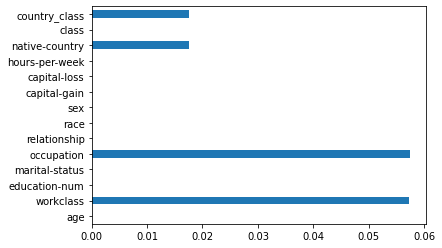

In [71]:
df.isna().mean()
df.isna().mean().plot(kind='barh')

### native-country

In [74]:
# native-country -> 불법이민, 무국적자?
# native-country -> country_class
# 0~1 사이의 비율값 <=> 구분점을 두기 위해서 빈값(NaN)은 -99
df['country_class'].fillna(-99)
df['country_class'].fillna(-99, inplace=True)
df['country_class'].isna().sum()

0

<Axes: >

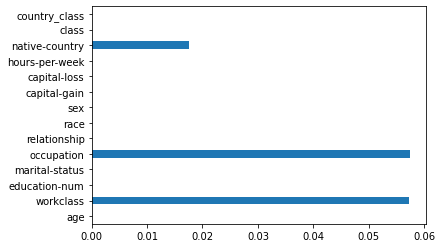

In [75]:
df.isna().mean().plot(kind='barh')

### workclass

In [76]:
df.workclass.value_counts() / len(df)

Private            0.69
Self-emp-not-inc   0.08
Local-gov          0.06
State-gov          0.04
Self-emp-inc       0.03
Federal-gov        0.03
Without-pay        0.00
Never-worked       0.00
Name: workclass, dtype: float64

<Axes: >

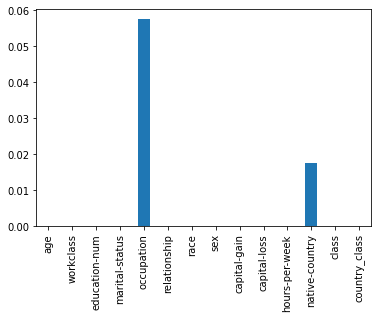

In [78]:
# 최빈값으로 채워줌
df['workclass'].fillna('Private', inplace=True)
df.isna().mean().plot(kind='bar')

### occupation

In [79]:
df.occupation.value_counts() / len(df)

Prof-specialty      0.13
Craft-repair        0.13
Exec-managerial     0.12
Adm-clerical        0.11
Sales               0.11
Other-service       0.10
Machine-op-inspct   0.06
Transport-moving    0.05
Handlers-cleaners   0.04
Farming-fishing     0.03
Tech-support        0.03
Protective-serv     0.02
Priv-house-serv     0.00
Armed-Forces        0.00
Name: occupation, dtype: float64

<Axes: >

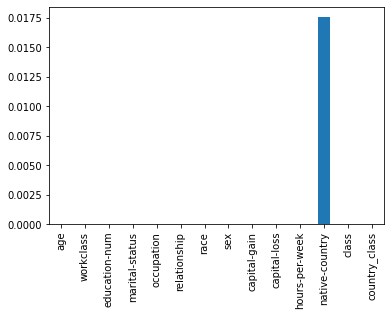

In [80]:
# 알수 없음(Unknown)
df['occupation'].fillna('Unknown', inplace=True)
df.isna().mean().plot(kind='bar')

<Axes: >

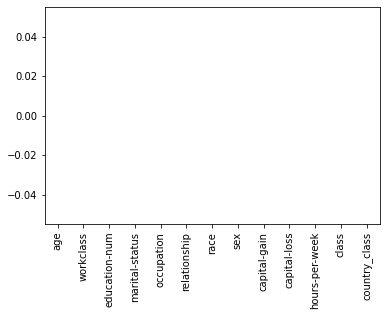

In [82]:
df.drop('native-country', axis=1, inplace=True)
df.isna().mean().plot(kind='bar')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   education-num   48842 non-null  int64  
 3   marital-status  48842 non-null  object 
 4   occupation      48842 non-null  object 
 5   relationship    48842 non-null  object 
 6   race            48842 non-null  object 
 7   sex             48842 non-null  object 
 8   capital-gain    48842 non-null  int64  
 9   capital-loss    48842 non-null  int64  
 10  hours-per-week  48842 non-null  int64  
 11  class           48842 non-null  int64  
 12  country_class   48842 non-null  float64
dtypes: float64(1), int64(6), object(6)
memory usage: 4.8+ MB


In [85]:
df.describe(include='O')
df.describe(include='O').columns

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex'],
      dtype='object')

In [87]:
df_dummy = pd.get_dummies(
    df, columns = df.describe(include='O').columns, drop_first=True
)
df_dummy.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,class,country_class,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,25,7,0,0,40,0,0.24,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1,38,9,0,0,50,0,0.24,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,28,12,0,0,40,1,0.24,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,44,10,7688,0,40,1,0.24,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,18,10,0,0,30,0,0.24,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [88]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   48842 non-null  int64  
 1   education-num                         48842 non-null  int64  
 2   capital-gain                          48842 non-null  int64  
 3   capital-loss                          48842 non-null  int64  
 4   hours-per-week                        48842 non-null  int64  
 5   class                                 48842 non-null  int64  
 6   country_class                         48842 non-null  float64
 7   workclass_Local-gov                   48842 non-null  uint8  
 8   workclass_Never-worked                48842 non-null  uint8  
 9   workclass_Private                     48842 non-null  uint8  
 10  workclass_Self-emp-inc                48842 non-null  uint8  
 11  workclass_Self-

## 훈련셋/시험셋 분리

In [89]:
X = df_dummy.drop('class', axis=1)# 독립변수 (관측값, 피쳐)
y = df_dummy['class'] # 종속변수 (예측값, 라벨)

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=110
)

# 모델링 & 평가

In [92]:
# 회귀 - 연속형변수 예측 - DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier # 분류 - 범주형 변수 예측

In [93]:
model = DecisionTreeClassifier(random_state=111)

In [94]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=111)

In [95]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
model.predict_proba(X_test)

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [0.5, 0.5],
       [0.5, 0.5],
       [1. , 0. ]])

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [98]:
# accuracy_score(실제값(시험셋), 예측결과)
accuracy_score(y_test, y_pred)

0.8175769053590622

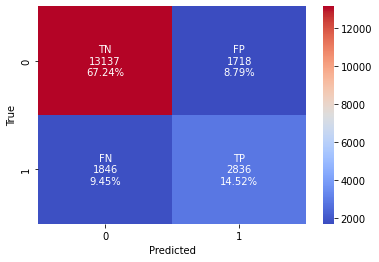

In [99]:
cf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

# 트리 그래프 시각화

In [100]:
from sklearn.tree import plot_tree

In [101]:
df_dummy.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'class', 'country_class', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'occupation_Unknown',
       'relationship_Not-in

In [108]:
from sklearn.tree import export_graphviz

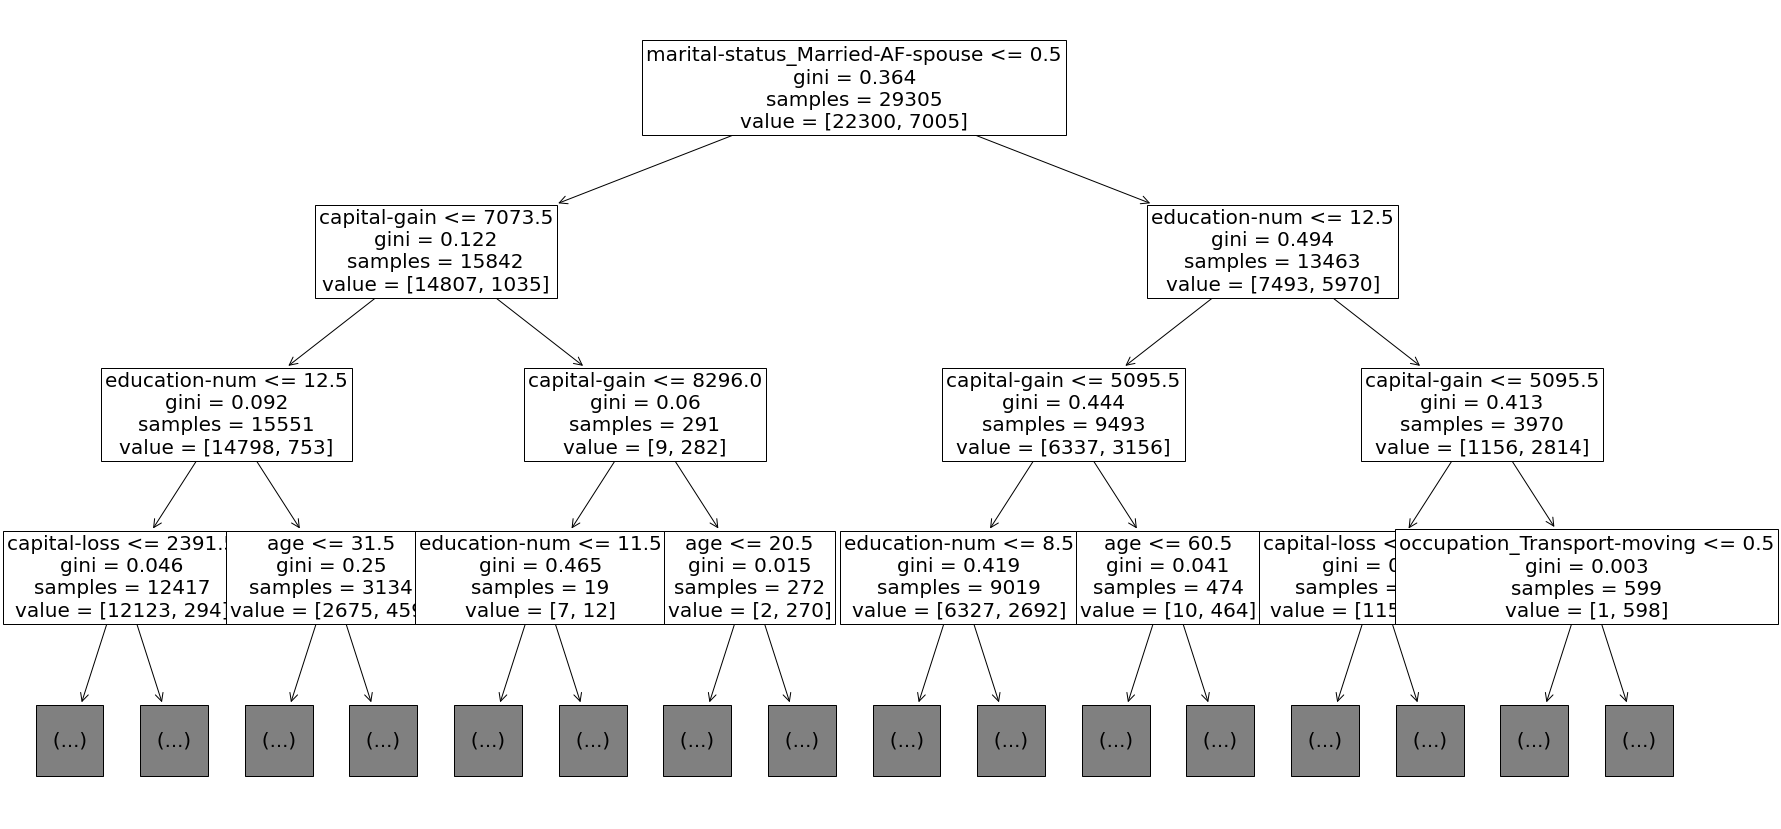

In [109]:
plt.figure(figsize=(30, 15)) # plt 객체의 크기 결정
# 트리 구조를 보고 싶은 모델을 넣고, 최대 깊이, 폰트 사이즈, 
# plot_tree(model, max_depth=3, fontsize=20) # 변수명 지정 X
plot_tree(model, max_depth=3, fontsize=20, feature_names=df_dummy.columns) # 독립변수명을 추가로 지정
plt.show()

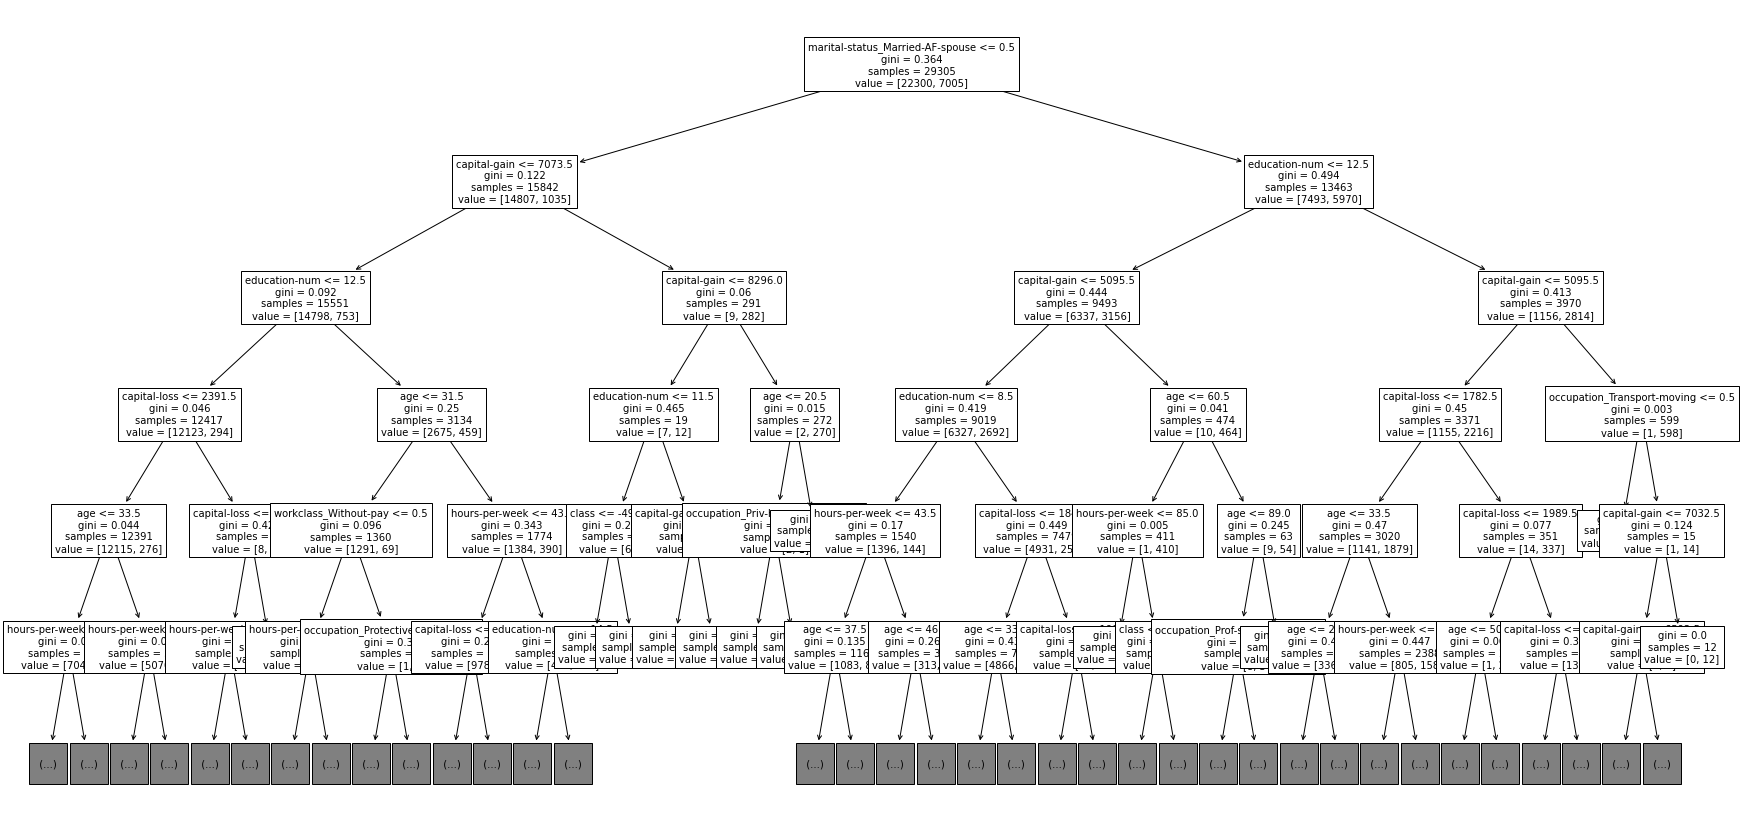

In [110]:
plt.figure(figsize=(30, 15))
plot_tree(model, max_depth=5, fontsize=10, feature_names=df_dummy.columns) # 독립변수명을 추가로 지정
plt.show()

# 하이퍼 패러미터 튜닝

In [115]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=100)
model.fit(X_train, y_train) # 훈련 데이터 -> 모델 학습
# 훈련 데이터로 모델을 통해서 예측
train_pred = model.predict(X_train) # 학습을 시킨 값으로 다시 예측
# 시험 데이터로 모델을 통해서 예측
test_pred = model.predict(X_test) # 새로운 값으로 신규 예측
print(f"Train Score : {accuracy_score(y_train, train_pred)}") # 기출문제 풀기
print(f"Test Score : {accuracy_score(y_test, test_pred)}") # 새로운 문제 풀기
# 훈련된 데이터는 잘 예측하는데 시험 데이터는 잘 예측 못한다?
# 학습이 너무 잘 되어있다 = 새로운 데이터에 대한 적응력이 떨어진다
# 과최적화 되어있다 = over-fitting

Train Score : 0.9779218563385088
Test Score : 0.8187029738445002


In [116]:
# max_depth : 트리의 깊이 제한
model = DecisionTreeClassifier(random_state=100, max_depth=5)
model.fit(X_train, y_train) # 훈련 데이터 -> 모델 학습
# 훈련 데이터로 모델을 통해서 예측
train_pred = model.predict(X_train) # 학습을 시킨 값으로 다시 예측
# 시험 데이터로 모델을 통해서 예측
test_pred = model.predict(X_test) # 새로운 값으로 신규 예측
print(f"Train Score : {accuracy_score(y_train, train_pred)}") # 기출문제 풀기
print(f"Test Score : {accuracy_score(y_test, test_pred)}") # 새로운 문제 풀기

Train Score : 0.8504350793379969
Test Score : 0.8493115626759482


> 트리가 깊어지면 오버피팅 문제가 난다

* 기본값(결정 트리)의 설정은 구분되는 것까지 가장 깊은 노드값까지 탐색해서 내려갑니다
* 오버피팅(과최적화) : 학습이 너무 잘되서 새로운 데이터에 대한 예측력이 오히려 떨어지는 상황

In [117]:
# max_depth : 트리의 깊이 제한
model = DecisionTreeClassifier(random_state=100, max_depth=7)
model.fit(X_train, y_train) # 훈련 데이터 -> 모델 학습
# 훈련 데이터로 모델을 통해서 예측
train_pred = model.predict(X_train) # 학습을 시킨 값으로 다시 예측
# 시험 데이터로 모델을 통해서 예측
test_pred = model.predict(X_test) # 새로운 값으로 신규 예측
print(f"Train Score : {accuracy_score(y_train, train_pred)}") # 기출문제 풀기
print(f"Test Score : {accuracy_score(y_test, test_pred)}") # 새로운 문제 풀기

Train Score : 0.8598873912301656
Test Score : 0.858268925628295


In [118]:
def test_depth(depth):
    # max_depth : 트리의 깊이 제한
    model = DecisionTreeClassifier(random_state=100, max_depth=depth)
    model.fit(X_train, y_train) # 훈련 데이터 -> 모델 학습
    # 훈련 데이터로 모델을 통해서 예측
    train_pred = model.predict(X_train) # 학습을 시킨 값으로 다시 예측
    # 시험 데이터로 모델을 통해서 예측
    test_pred = model.predict(X_test) # 새로운 값으로 신규 예측
    print(f"depth : {depth}")
    print(f"Train Score : {accuracy_score(y_train, train_pred)}") # 기출문제 풀기
    print(f"Test Score : {accuracy_score(y_test, test_pred)}") # 새로운 문제 풀기

In [119]:
for i in range(1, 20):
    test_depth(i)

depth : 1
Train Score : 0.7609622931240403
Test Score : 0.7603521523263551
depth : 2
Train Score : 0.8268554854120457
Test Score : 0.8323181655320674
depth : 3
Train Score : 0.8423477222317011
Test Score : 0.8467523161181348
depth : 4
Train Score : 0.8428937041460501
Test Score : 0.8466499462558222
depth : 5
Train Score : 0.8504350793379969
Test Score : 0.8493115626759482
depth : 6
Train Score : 0.8549735540010237
Test Score : 0.8568357475559195
depth : 7
Train Score : 0.8598873912301656
Test Score : 0.858268925628295
depth : 8
Train Score : 0.8641187510663709
Test Score : 0.8578082612478887
depth : 9
Train Score : 0.868042996075755
Test Score : 0.8602139530122332
depth : 10
Train Score : 0.8706022862992663
Test Score : 0.857501151660951
depth : 11
Train Score : 0.8754478757891145
Test Score : 0.8590878845267953
depth : 12
Train Score : 0.8804640846271967
Test Score : 0.8564774530378256
depth : 13
Train Score : 0.8848660638116362
Test Score : 0.8544812407227312
depth : 14
Train Score :